In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('max_rows',1000)
import seaborn as sns
import os
from glob import iglob

/Users/mikesivley/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Load results from the D analysis
D   = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/multiK_analysis_2016-05-27/clinvar-exac/clinvar-exac_D_summary.txt",delimiter='\t')
D   = D.drop_duplicates(["sid","chain"])
KAD = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/multiK_analysis_2016-05-27/clinvar-exac/clinvar-exac_KAD_summary.txt",delimiter='\t')
KAD = KAD.drop_duplicates(["sid","chain"])
KBD = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/multiK_analysis_2016-05-27/clinvar-exac/clinvar-exac_KBD_summary.txt",delimiter='\t')
KBD = KBD.drop_duplicates(["sid","chain"])

In [3]:
print "Number of structures evaluated:",
print len(D)

print "\nD Proportion with nominally significant unweighted p-values:"
print "Permutation:  (%4d) %.4f"%(len(D[D["p"]<0.01]),len(D[D["p"]<0.01]) / float(len(D)))
# print "Perm Z-Score: (%4d) %.4f"%(len(D[D["z_p"]<0.01]),len(D[D["z_p"]<0.01]) / float(len(D)))

print "\nKAD Proportion with nominally significant unweighted p-values:"
print "Permutation:  (%4d) %.4f"%(len(KAD[KAD["p"]<0.01]),len(KAD[KAD["p"]<0.01]) / float(len(KAD)))
# print "Perm Z-Score: (%4d) %.4f"%(len(KAD[KAD["z_p"]<0.01]),len(KAD[KAD["z_p"]<0.01]) / float(len(KAD)))

print "\nKBD Proportion with nominally significant unweighted p-values:"
print "Permutation:  (%4d) %.4f"%(len(KBD[KBD["p"]<0.01]),len(KBD[KBD["p"]<0.01]) / float(len(KBD)))
# print "Perm Z-Score: (%4d) %.4f"%(len(KBD[KBD["z_p"]<0.01]),len(KBD[KBD["z_p"]<0.01]) / float(len(KBD)))

Number of structures evaluated: 450

D Proportion with nominally significant unweighted p-values:
Permutation:  (  58) 0.1289

KAD Proportion with nominally significant unweighted p-values:
Permutation:  (  52) 0.1156

KBD Proportion with nominally significant unweighted p-values:
Permutation:  (  41) 0.0911


In [4]:
from qvalue import estimate
THRESH = 0.1

D['q'],    D_lam,  D_pi = estimate(  D['p'].values)
KAD['q'],KAD_lam,KAD_pi = estimate(KAD['p'].values)
KBD['q'],KBD_lam,KBD_pi = estimate(KBD['p'].values)

print "Proteins passing an FDR of %.0f%% for K_clinvar - K_exac"%(THRESH*100)
print "Permutation: %4d"%(D["q"]<THRESH).sum()

print "\nProteins passing an FDR of %.0f%% for K_clinvar - K*"%(THRESH*100)
print "Permutation: %4d"%(KAD["q"]<THRESH).sum()

print "\nProteins passing an FDR of %.0f%% for K_exac - K*"%(THRESH*100)
print "Permutation: %4d"%(KBD["q"]<THRESH).sum()

Proteins passing an FDR of 10% for K_clinvar - K_exac
Permutation:  110

Proteins passing an FDR of 10% for K_clinvar - K*
Permutation:   86

Proteins passing an FDR of 10% for K_exac - K*
Permutation:   61


In [9]:
D.to_csv("/Volumes/sivleyrm/pdbmap/results/ripleysK_results/pdb_clinvar_exac_multivariate_D.txt",
            header=False,index=False,sep="\t",na_rep="\N")
KAD.to_csv("/Volumes/sivleyrm/pdbmap/results/ripleysK_results/pdb_clinvar_exac_multivariate_KAD.txt",
            header=False,index=False,sep="\t",na_rep="\N")
KBD.to_csv("/Volumes/sivleyrm/pdbmap/results/ripleysK_results/pdb_clinvar_exac_multivariate_KBD.txt",
            header=False,index=False,sep="\t",na_rep="\N")

In [6]:
print D.head(1)
print KAD.head(1)
print KBD.head(1)

    sid chain  Na  Nb       DAB        p         z     z_p  optT         q
0  1APJ     A   3   4 -1.083211  0.57368 -1.078748  0.2807     6  0.503116
    sid chain  Na  Nb  KAD       p         z       z_p  optT        q
0  1APJ     A   3   4    0  0.8564  0.003778  0.996985     6  0.60457
    sid chain  Na  Nb      KBD        p         z       z_p  optT         q
0  1APJ     A   3   4  1.52536  0.57368  1.523926  0.127527     6  0.467284


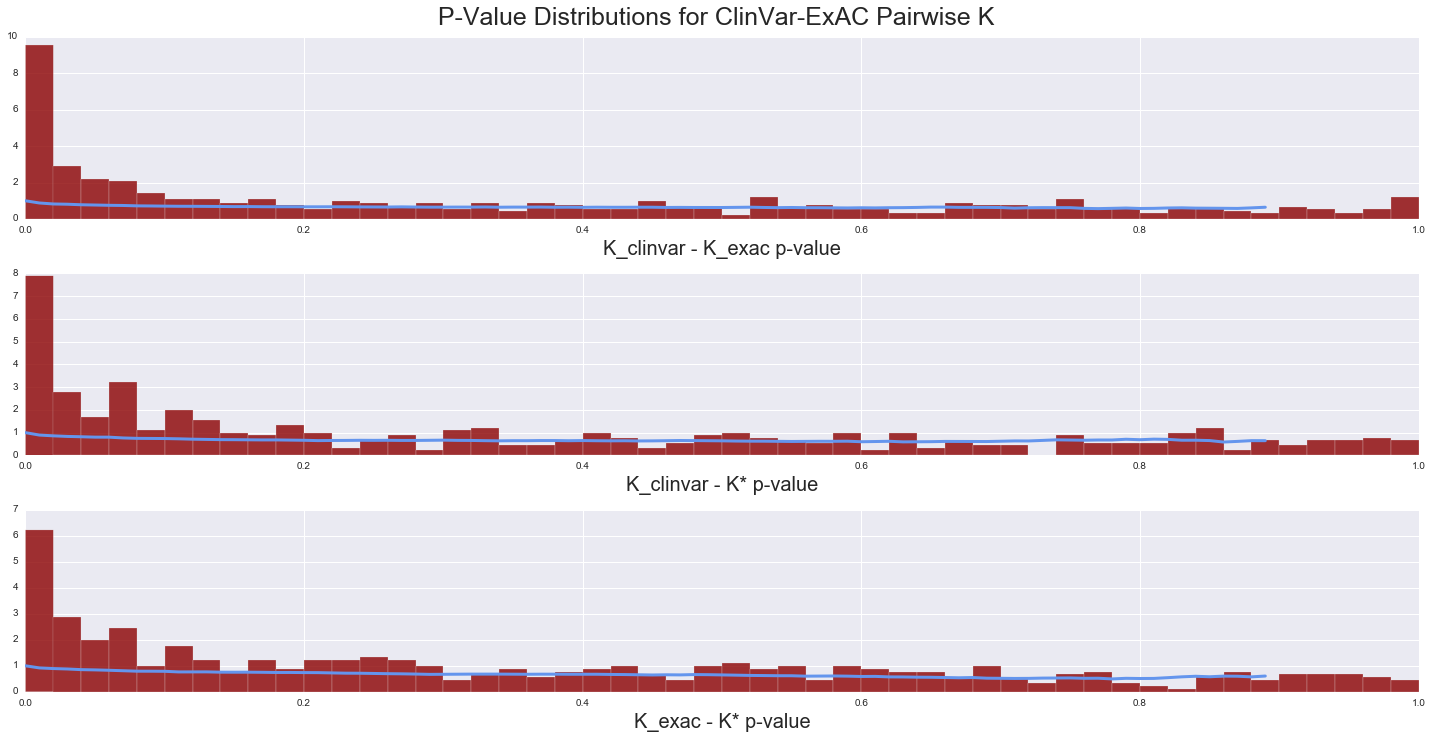

In [30]:
# P-Value Distributions
fig,ax = plt.subplots(3,1,figsize=(20,10))
plt.suptitle("P-Value Distributions for ClinVar-ExAC Pairwise K",fontsize=25,y=1.02)

ax[0].set_xlabel("K_clinvar - K_exac p-value",fontsize=20)
# ax[0].hist(D["z_p"],bins=np.arange(0,1.02,0.02),color="darkblue",normed=True)
ax[0].hist(D["p"],bins=np.arange(0,1.02,0.02),color="darkred",normed=True,alpha=0.8)
ax[0].plot(D_lam,D_pi,lw=3,c='cornflowerblue')

ax[1].set_xlabel("K_clinvar - K* p-value",fontsize=20)
# ax[1].hist(KAD["z_p"],bins=np.arange(0,1.02,0.02),color="darkblue",normed=True)
ax[1].hist(KAD["p"],bins=np.arange(0,1.02,0.02),color="darkred",normed=True,alpha=0.8)
ax[1].plot(KAD_lam,KAD_pi,lw=3,c='cornflowerblue')

ax[2].set_xlabel("K_exac - K* p-value",fontsize=20)
# ax[2].hist(KBD["z_p"],bins=np.arange(0,1.02,0.02),color="darkblue",normed=True)
ax[2].hist(KBD["p"],bins=np.arange(0,1.02,0.02),color="darkred",normed=True,alpha=0.8)
ax[2].plot(KBD_lam,KBD_pi,lw=3,c='cornflowerblue')

plt.tight_layout()
plt.show()

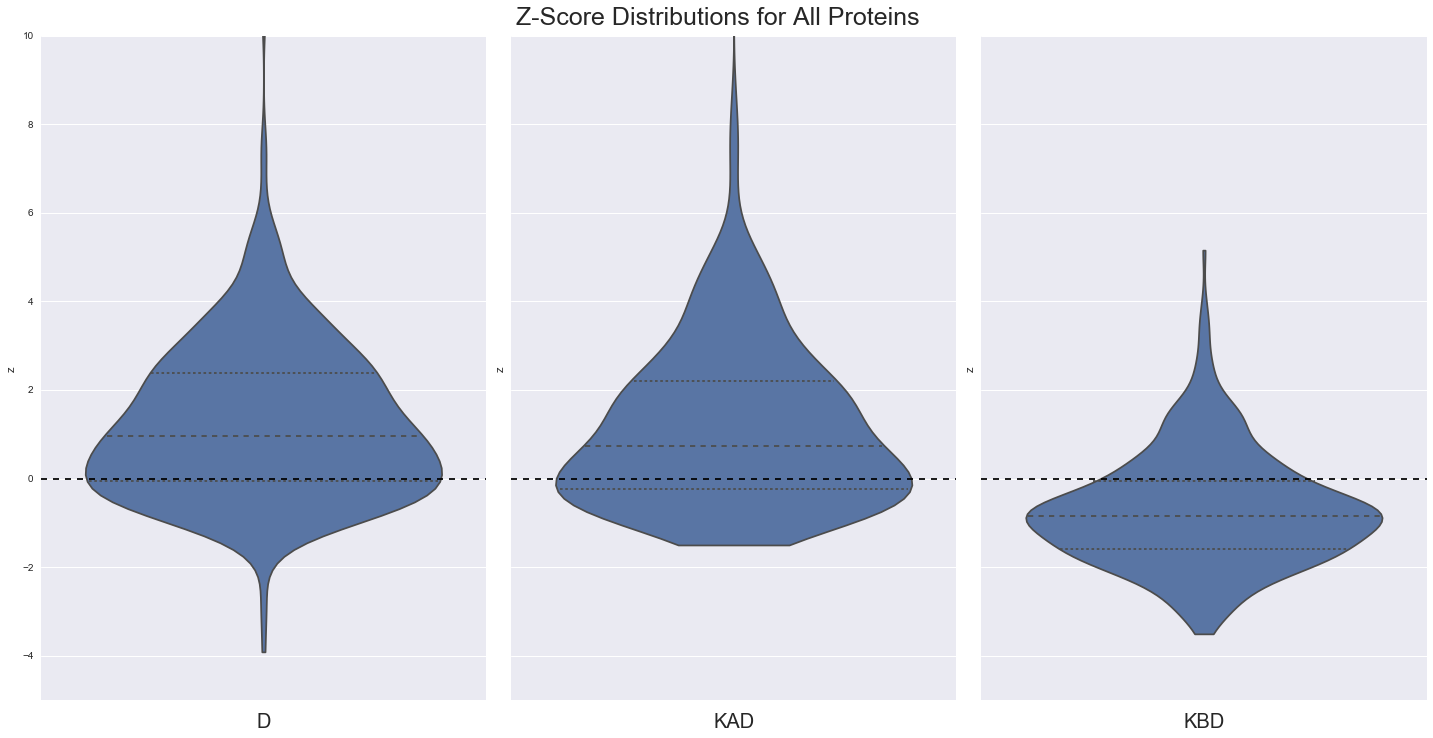

In [31]:
fig,ax = plt.subplots(1,3,figsize=(20,10),sharey=True)
sns.violinplot(  D['z'],ax=ax[0],cut=0,orient='v',inner='quart')
sns.violinplot(KAD['z'],ax=ax[1],cut=0,orient='v',inner='quart')
sns.violinplot(KBD['z'],ax=ax[2],cut=0,orient='v',inner='quart')
ax[0].set_xlabel("D",fontsize=20)
ax[1].set_xlabel("KAD",fontsize=20)
ax[2].set_xlabel("KBD",fontsize=20)
plt.ylim([-5,10])
plt.suptitle("Z-Score Distributions for All Proteins",fontsize=25,y=1.02)
ax[0].axhline(0.,ls='dashed',c='black')
ax[1].axhline(0.,ls='dashed',c='black')
ax[2].axhline(0.,ls='dashed',c='black')
plt.tight_layout()
plt.show()

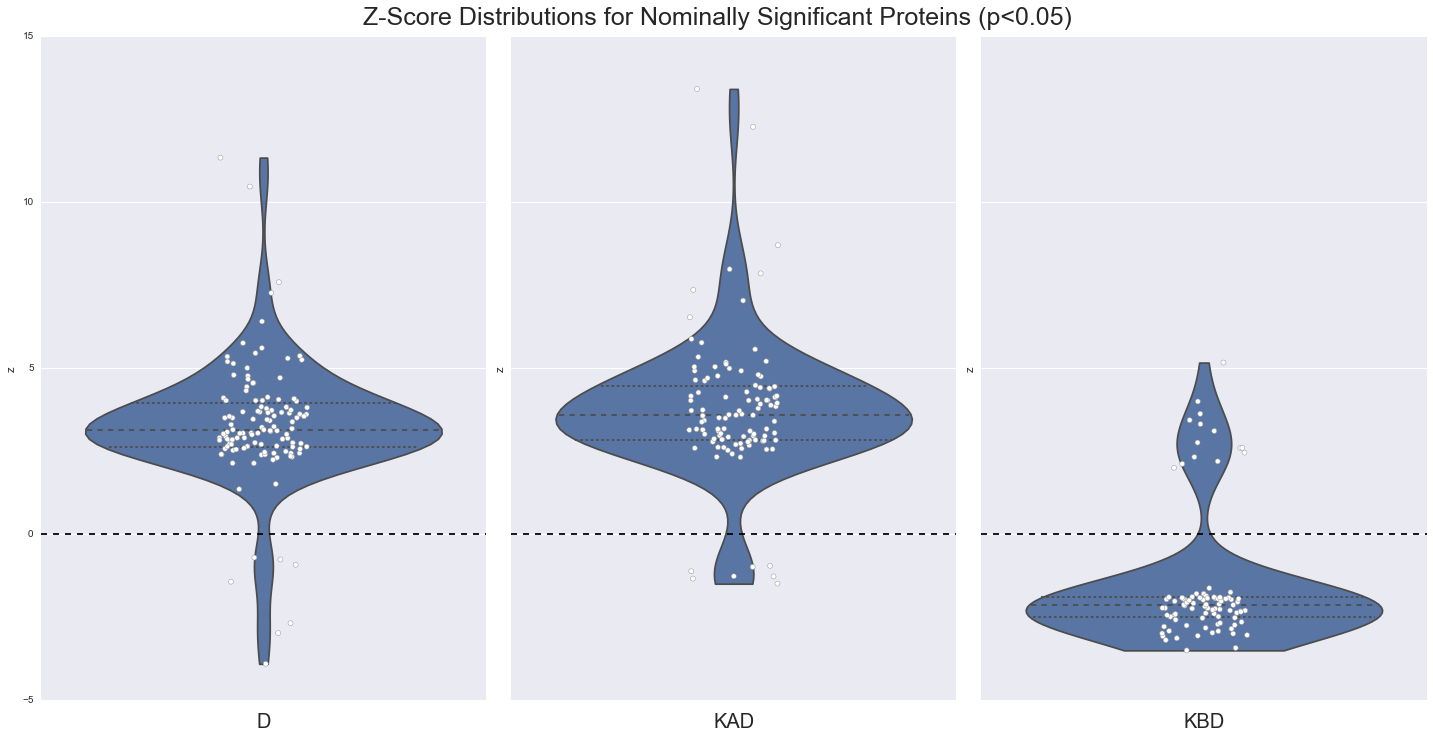

In [32]:
fig,ax = plt.subplots(1,3,figsize=(20,10),sharey=True)
sns.violinplot(  D.ix[  D['p']<0.05,'z'],ax=ax[0],cut=0,orient='v',inner='quart')
sns.stripplot(   D.ix[  D['p']<0.05,'z'],ax=ax[0],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KAD.ix[KAD['p']<0.05,'z'],ax=ax[1],cut=0,orient='v',inner='quart')
sns.stripplot( KAD.ix[KAD['p']<0.05,'z'],ax=ax[1],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KBD.ix[KBD['p']<0.05,'z'],ax=ax[2],cut=0,orient='v',inner='quart')
sns.stripplot( KBD.ix[KBD['p']<0.05,'z'],ax=ax[2],orient='v',jitter=True,lw=0.5,color='white')
ax[0].set_xlabel("D",fontsize=20)
ax[1].set_xlabel("KAD",fontsize=20)
ax[2].set_xlabel("KBD",fontsize=20)
plt.ylim([-5,15])
plt.suptitle("Z-Score Distributions for Nominally Significant Proteins (p<0.05)",fontsize=25,y=1.02)
ax[0].axhline(0.,ls='dashed',c='black')
ax[1].axhline(0.,ls='dashed',c='black')
ax[2].axhline(0.,ls='dashed',c='black')
plt.tight_layout()
plt.show()

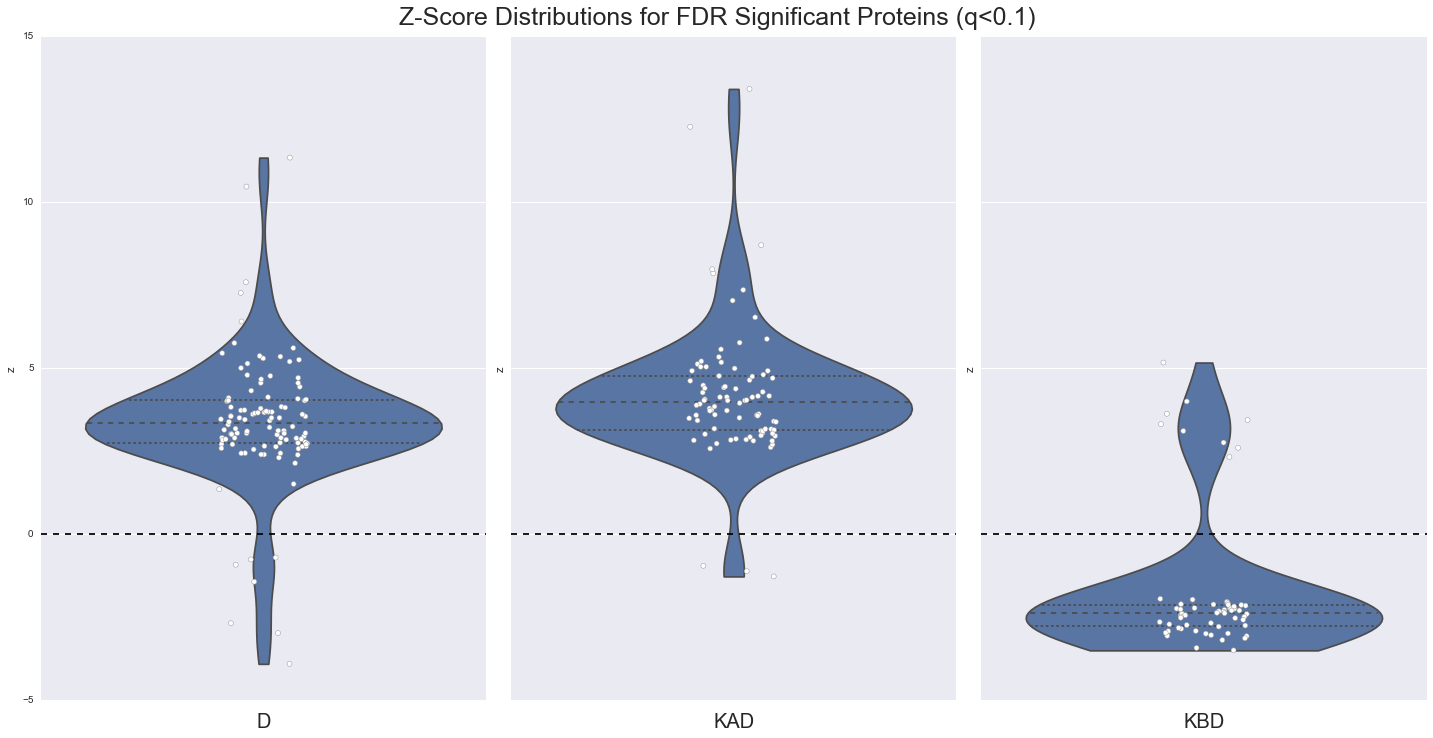

In [33]:
fig,ax = plt.subplots(1,3,figsize=(20,10),sharey=True)
sns.violinplot(  D.ix[  D['q']<0.1,'z'],ax=ax[0],cut=0,orient='v',inner='quart')
sns.stripplot(   D.ix[  D['q']<0.1,'z'],ax=ax[0],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KAD.ix[KAD['q']<0.1,'z'],ax=ax[1],cut=0,orient='v',inner='quart')
sns.stripplot( KAD.ix[KAD['q']<0.1,'z'],ax=ax[1],orient='v',jitter=True,lw=0.5,color='white')
sns.violinplot(KBD.ix[KBD['q']<0.1,'z'],ax=ax[2],cut=0,orient='v',inner='quart')
sns.stripplot( KBD.ix[KBD['q']<0.1,'z'],ax=ax[2],orient='v',jitter=True,lw=0.5,color='white')
ax[0].set_xlabel("D",fontsize=20)
ax[1].set_xlabel("KAD",fontsize=20)
ax[2].set_xlabel("KBD",fontsize=20)
plt.ylim([-5,15])
plt.suptitle("Z-Score Distributions for FDR Significant Proteins (q<0.1)",fontsize=25,y=1.02)
ax[0].axhline(0.,ls='dashed',c='black')
ax[1].axhline(0.,ls='dashed',c='black')
ax[2].axhline(0.,ls='dashed',c='black')
plt.tight_layout()
plt.show()

In [34]:
# Identify the FDR-significant proteins
print "FDR-Significant Difference in Clustered-ness:"
print D.ix[D['q']<0.1,["sid","chain","z","q"]].sort_values(by="z")

print "\nFDR-Significant K_clinvar - K_clinvar,exac"
print KAD.ix[KAD['q']<0.1,["sid","chain","z","q"]].sort_values(by="z")

print "\nFDR-Significant K_exac - K_clinvar,exac"
print KBD.ix[KBD['q']<0.1,["sid","chain","z","q"]].sort_values(by="z")

FDR-Significant Difference in Clustered-ness:
      sid chain          z         q
230  1YG5     C  -3.916285  0.034494
18   1I3D     A  -2.988537  0.067009
302  6PAX     A  -2.692077  0.023505
282  1T2F     C  -1.441684  0.089658
59   3NHB     A  -0.931033  0.099656
85   4BGG     A  -0.771846  0.062836
190  2QYN     A  -0.715069  0.082121
301  4IJQ     C   1.344581  0.042734
103  3LUE     F   1.501357  0.098415
141  1C9Y     A   2.128955  0.057569
430  4DB1     A   2.294982  0.064135
99   1GBN     B   2.379863  0.091478
12   3LXC     A   2.389161  0.047978
222  1QK9     A   2.389934  0.099656
203  1SOS     E   2.425651  0.042734
395  4MZR     B   2.426773  0.057569
113  3QD6     D   2.431830  0.095385
354  1V16     A   2.542179  0.099398
160  3THC     A   2.564188  0.082121
268  3II5     A   2.578442  0.034494
273  1WSV     A   2.625473  0.095385
377  4FNW     A   2.632121  0.095385
60   1D5R     A   2.634802  0.019570
98   4BKT     I   2.644408  0.047978
447  3IKM     D   2.695572  0

In [35]:
# Look for significant segregation
sigKAD = KAD.ix[(KAD['q']<0.1) & (KAD['z']>0),["sid","chain"]]
sigKBD = KBD.ix[(KBD['q']<0.1) & (KBD['z']>0),["sid","chain"]]
print "Proteins with co-occuring, significant K1-K* and K2-K*"
for t in set([(s,c) for _,s,c in sigKAD.itertuples()]).intersection([(s,c) for _,s,c in sigKBD.itertuples()]):
    print "%s\t%s"%t

Proteins with co-occuring, significant K1-K* and K2-K*
2H5G	B
2RD0	A
3LBX	B
1NR1	C


In [36]:
# Look for significant overlap
sigKAD = KAD.ix[(KAD['q']<0.1) & (KAD['z']<0),["sid","chain"]]
sigKBD = KBD.ix[(KBD['q']<0.1) & (KBD['z']<0),["sid","chain"]]
print "Proteins with co-occuring, significant K1-K* and K2-K*"
for t in set([(s,c) for _,s,c in sigKAD.itertuples()]).intersection([(s,c) for _,s,c in sigKBD.itertuples()]):
    print "%s\t%s"%t

Proteins with co-occuring, significant K1-K* and K2-K*


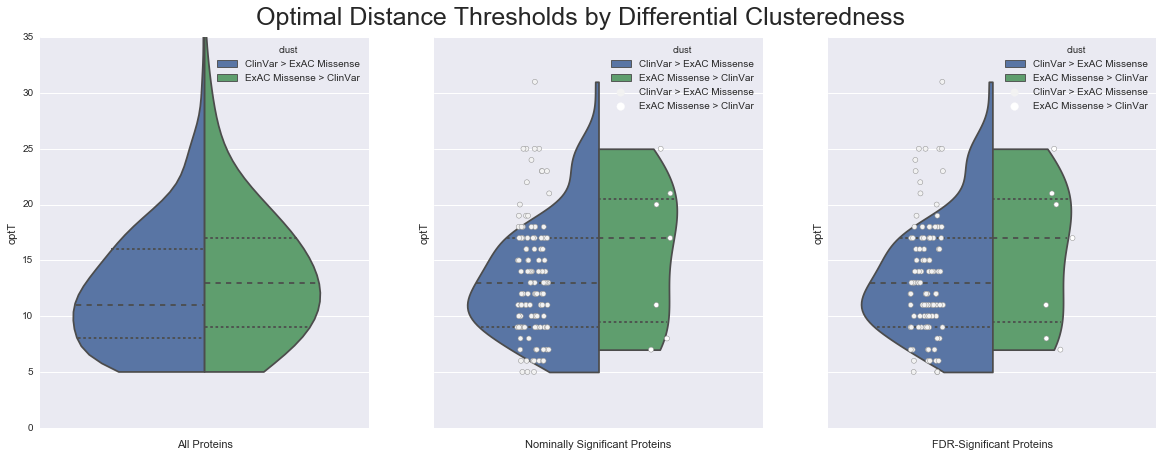

In [37]:
fig,ax = plt.subplots(1,3,figsize=(20,7),sharey=True)
df = D.copy()
ho = ['ClinVar > ExAC Missense','ExAC Missense > ClinVar']
df.ix[df['z']>0.,'clust'] = 'ClinVar > ExAC Missense'
df.ix[df['clust'].isnull(),'clust'] = 'ExAC Missense > ClinVar'
df[''] = ''
plt.suptitle("Optimal Distance Thresholds by Differential Clusteredness",fontsize=25,y=.96)
sns.violinplot(x='',y='optT',hue='clust',data=df,split=True,cut=0,ax=ax[0],inner='quart',hue_order=ho)
ax[0].set_xlabel("All Proteins")
sns.violinplot(x='',y='optT',hue='clust',data=df[df['p']<0.05],split=True,cut=0,ax=ax[1],inner='quart',hue_order=ho)
sns.stripplot(x='',y='optT',hue='clust',data=df[df['p']<0.05],split=True,orient='v',jitter=True,lw=0.5,color='white',hue_order=ho,ax=ax[1])
ax[1].set_xlabel("Nominally Significant Proteins")
sns.violinplot(x='',y='optT',hue='clust',data=df[df['q']<0.1],split=True,cut=0,ax=ax[2],inner='quart',hue_order=ho)
sns.stripplot(x='',y='optT',hue='clust',data=df[df['q']<0.1],split=True,orient='v',jitter=True,lw=0.5,color='white',hue_order=ho,ax=ax[2])
ax[2].set_xlabel("FDR-Significant Proteins")
plt.ylim([0,35])
plt.show()